In [0]:
train = spark.read.csv('/FileStore/tables/train_finally.csv', header="true", inferSchema="true")
test = spark.read.csv('/FileStore/tables/test_finally.csv', header="true", inferSchema="true")

In [0]:
import pyspark
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

In [0]:
display(train)

Electricity,ChilledWater,Steam,HotWater,building_id,meter_reading,site_id,primary_use,square_feet,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,hour,day,weekday,month
1,0,0,0,0,0.0,0,0,8.913684824725294,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,1,0.0,0,0,7.908754738783246,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,2,0.0,0,0,8.589885876809678,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,3,0.0,0,0,10.07263943528144,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,4,0.0,0,0,11.666573161179576,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,5,0.0,0,0,8.987321812850125,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,6,0.0,0,4,10.2373492417846,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,7,0.0,0,0,11.70416546727143,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,8,0.0,0,0,11.015509528114155,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1
1,0,0,0,9,0.0,0,6,10.203629181337648,25.0,6.0,20.0,0.0,1019.7,0.0,0.0,0,1,4,1


In [0]:
numerical_cols = train.columns

In [0]:
numerical_cols.remove('meter_reading')
numerical_cols

Out[56]: ['Electricity',
 'ChilledWater',
 'Steam',
 'HotWater',
 'building_id',
 'site_id',
 'primary_use',
 'square_feet',
 'air_temperature',
 'cloud_coverage',
 'dew_temperature',
 'precip_depth_1_hr',
 'sea_level_pressure',
 'wind_direction',
 'wind_speed',
 'hour',
 'day',
 'weekday',
 'month']

In [0]:
from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = numerical_cols, outputCol = 'features')
train_df = vectorAssembler.transform(train)
train_df = train_df.select(['features','meter_reading'])

In [0]:
train_df.show()

+--------------------+-------------+
 features|meter_reading|
+--------------------+-------------+
(19,[0,7,8,9,10,1...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
(19,[0,4,7,8,9,10...| 0.0|
(19,[0,4,6,7,8,9,...| 0.0|
+--------------------+-------------+
only showing top 20 rows

In [0]:
train_data, test_data = train_df.randomSplit([0.7, 0.3])

In [0]:
rmse_t = []
r2_t = []
index = []

# Linear Regression

In [0]:
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='meter_reading', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(train_data)

In [0]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.08583161235321933,-0.03532845958842736,0.0,0.0,0.0,0.5820574903545614,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
Intercept: -2.291862150581793

In [0]:
pred = lr_model.evaluate(test_data)
pred.predictions.show(5)

+--------------------+------------------+------------------+
 features| meter_reading| prediction|
+--------------------+------------------+------------------+
(19,[0,4,5,6,7,8,...| 3.283539338193923|2.6950295823379995|
(19,[0,4,5,6,7,8,...|2.8616292890305104| 3.217707807235714|
(19,[0,4,5,6,7,8,...| 6.022236205774735| 5.404972024819459|
(19,[0,4,5,6,7,8,...| 4.380024632003209| 4.323723506860121|
(19,[0,4,5,6,7,8,...|3.7278597537548204| 3.947448002403537|
+--------------------+------------------+------------------+
only showing top 5 rows

In [0]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
rmse_t.append(trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
r2_t.append(trainingSummary.r2)
index.append('Linear Regression')

RMSE: 1.931033
r2: 0.186104

In [0]:
LR_pred = list(pred.predictions.select('prediction').toPandas()['prediction'])
LR_test = list(pred.predictions.select('meter_reading').toPandas()['meter_reading'])

In [0]:
import pandas as pd
g = {'pred': LR_pred, 'true':LR_test,}
gf = pd.DataFrame(data = g)

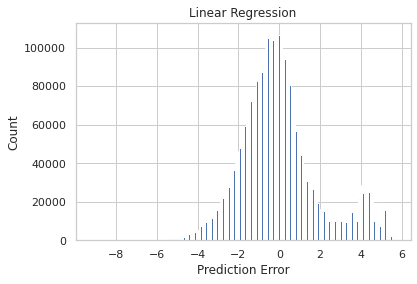

In [0]:
import matplotlib
import matplotlib.pyplot as plt

error = gf.pred - gf.true
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error")
plt.title("Linear Regression")
_ = plt.ylabel("Count")

In [0]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.4999999999999998, 0.4899164781322888, 0.44794522049030805, 0.44638643840349335, 0.44635586170065666, 0.4463531733615131, 0.44635276231648846, 0.44635275504933125, 0.4463527541846627, 0.446352754084072, 0.44635275407226016]
+--------------------+
 residuals|
+--------------------+
 0.9953627074689053|
 -0.3207428449669667|
 -1.497483924466162|
-0.08586502225921144|
 0.21187487237442681|
 0.648679115663306|
-6.56743638350221...|
 -0.8962159722258254|
 -0.8253867859527211|
 -0.9874245682663529|
 0.5670210646991771|
 0.23438228397292749|
 0.0799626737548671|
 -0.591569860313955|
 0.30740331981534297|
 1.0607062782364522|
 -0.5507186410638178|
 0.2730583025165787|
 0.06191728177031841|
 0.27121293258101353|
+--------------------+
only showing top 20 rows

In [0]:
trainingSummary.explainedVariance

Out[66]: 0.47832071488071604

In [0]:
test_col = test.columns
test_col.remove('row_id')

In [0]:
vectorAssembler = VectorAssembler(inputCols = test_col, outputCol = 'features')
eva_df = vectorAssembler.transform(test)
eva_df = train_df.select(['features'])

In [0]:
new_predictions = lr_model.transform(eva_df)
new_predictions.show(5)

+--------------------+------------------+
 features| prediction|
+--------------------+------------------+
(19,[0,7,8,9,10,1...| 2.896414868309351|
(19,[0,4,7,8,9,10...|2.3114877845041284|
(19,[0,4,7,8,9,10...|2.7079452653061398|
(19,[0,4,7,8,9,10...| 3.570993080364509|
(19,[0,4,7,8,9,10...| 4.498754144652274|
+--------------------+------------------+
only showing top 5 rows

# Decision Tree

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor

In [0]:
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'meter_reading')
dt_model = dt.fit(train_data)
dt_predictions = dt_model.transform(test_data)
dt_evaluator = RegressionEvaluator(labelCol="meter_reading", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
rmse_t.append(rmse)

Root Mean Squared Error (RMSE) on test data = 1.80275

In [0]:
dt_evaluator_1 = RegressionEvaluator(labelCol="meter_reading", predictionCol="prediction", metricName="r2")
r2 = dt_evaluator_1.evaluate(dt_predictions)
print("R2 on test data = %g" % r2)
r2_t.append(r2)
index.append('Decision Tree')

R2 on test data = 0.290904

In [0]:
dt_predictions

Out[123]: DataFrame[features: vector, meter_reading: double, prediction: double]

In [0]:
DR_pred = list(dt_predictions.select('prediction').toPandas()['prediction'])
DR_test = list(dt_predictions.select('meter_reading').toPandas()['meter_reading'])

In [0]:
g = {'pred': DR_pred, 'true':DR_test,}
gf = pd.DataFrame(data = g)

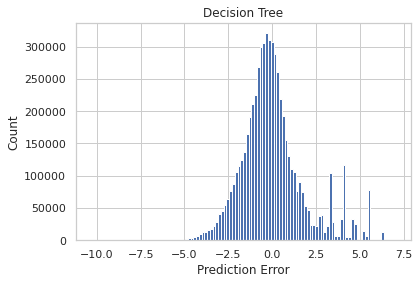

In [0]:
error = gf.pred - gf.true
plt.hist(error, bins = 110)
plt.xlabel("Prediction Error")
plt.title("Decision Tree")
_ = plt.ylabel("Count")

In [0]:
dt_predictions.show(5)

+--------------------+------------------+------------------+
 features| meter_reading| prediction|
+--------------------+------------------+------------------+
(19,[0,4,5,6,7,8,...| 3.283539338193923|2.7282809975649718|
(19,[0,4,5,6,7,8,...|2.8616292890305104|2.7282809975649718|
(19,[0,4,5,6,7,8,...| 6.022236205774735| 6.297384817382079|
(19,[0,4,5,6,7,8,...| 4.380024632003209| 4.03312009014075|
(19,[0,4,5,6,7,8,...|3.7278597537548204|3.2574134008929208|
+--------------------+------------------+------------------+
only showing top 5 rows

# Random Forest

In [0]:
from pyspark.ml.regression  import RandomForestRegressor

rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'meter_reading')
rfModel = rf.fit(train_data)
predictions = rfModel.transform(test_data)
rmse = dt_evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
rmse_t.append(rmse)
index.append('Random Forest')

Root Mean Squared Error (RMSE) on test data = 1.73437

In [0]:
r2 = dt_evaluator_1.evaluate(predictions)
print("R2 on test data = %g" % r2)
r2_t.append(r2)

R2 on test data = 0.343676

In [0]:
RF_pred = list(predictions.select('prediction').toPandas()['prediction'])
RF_test = list(predictions.select('meter_reading').toPandas()['meter_reading'])

In [0]:
g = {'pred': RF_pred, 'true':RF_test,}
gf = pd.DataFrame(data = g)

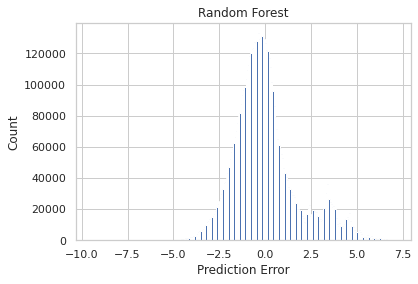

In [0]:
error = gf.pred - gf.true
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error")
plt.title("Random Forest")
_ = plt.ylabel("Count")

In [0]:
predictions.show(5)

+--------------------+------------------+------------------+
 features| meter_reading| prediction|
+--------------------+------------------+------------------+
(19,[0,4,5,6,7,8,...| 3.283539338193923| 2.728865992525196|
(19,[0,4,5,6,7,8,...|2.8616292890305104|2.8836659409088274|
(19,[0,4,5,6,7,8,...| 6.022236205774735| 4.939045967305926|
(19,[0,4,5,6,7,8,...| 4.380024632003209| 4.267227651664253|
(19,[0,4,5,6,7,8,...|3.7278597537548204|3.5337106932948332|
+--------------------+------------------+------------------+
only showing top 5 rows

# Boosted Decision Tree

In [0]:
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'meter_reading',maxIter = 10)
gbt_model = gbt.fit(train_data)
gbt_predictions = gbt_model.transform(test_data)
rmse = dt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
rmse_t.append(rmse)
index.append('Boosted Decision Tree')

Root Mean Squared Error (RMSE) on test data = 1.60865

In [0]:
r2 = dt_evaluator_1.evaluate(gbt_predictions)
print("R2 on test data = %g" % r2)
r2_t.append(r2)

R2 on test data = 0.435381

In [0]:
gbt_predictions.show(5)

+--------------------+------------------+------------------+
 features| meter_reading| prediction|
+--------------------+------------------+------------------+
(19,[0,4,5,6,7,8,...| 3.283539338193923| 2.438324440775942|
(19,[0,4,5,6,7,8,...|2.8616292890305104|2.8902828731357166|
(19,[0,4,5,6,7,8,...| 6.022236205774735| 6.277961288011606|
(19,[0,4,5,6,7,8,...| 4.380024632003209| 4.400716088171292|
(19,[0,4,5,6,7,8,...|3.7278597537548204|3.5704674675288484|
+--------------------+------------------+------------------+
only showing top 5 rows

In [0]:
BT_pred = list(gbt_predictions.select('prediction').toPandas()['prediction'])
BT_test = list(gbt_predictions.select('meter_reading').toPandas()['meter_reading'])

In [0]:
g = {'pred': BT_pred, 'true':BT_test,}
gf = pd.DataFrame(data = g)

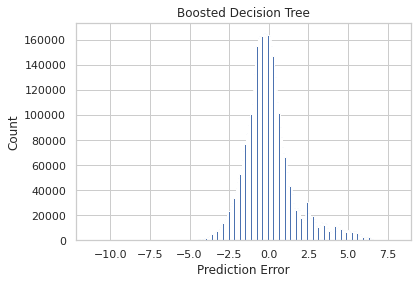

In [0]:
error = gf.pred - gf.true
plt.hist(error, bins = 250)
plt.xlabel("Prediction Error")
plt.title("Boosted Decision Tree")
_ = plt.ylabel("Count")

In [0]:
index.append("Neural Network")
rmse_t.append(1.5610467637686212)
r2_t.append(0.4679414300181476)

In [0]:
print(index)
print(rmse_t)
print(r2_t)

['Linear Regression', 'Decision Tree', 'Random Forest', 'Boosted Decision Tree', 'Neural Network']
[1.9310328859125032, 1.8027492287293005, 1.7343707625647047, 1.608645137745015, 1.5610467637686212]
[0.18610383510360395, 0.29090366467185125, 0.3436756887049134, 0.43538149822398353, 0.4679414300181476]

In [0]:
import pandas as pd
d = {'Model name': index, 'RMSE':rmse_t, 'R2':r2_t}
df = pd.DataFrame(data = d)

In [0]:
df

Out[139]:

,Model name,RMSE,R2
0,Linear Regression,1.931033,0.186104
1,Decision Tree,1.802749,0.290904
2,Random Forest,1.734371,0.343676
3,Boosted Decision Tree,1.608645,0.435381
4,Neural Network,1.561047,0.467941


Out[140]:

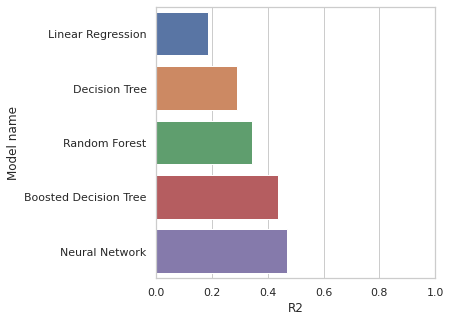

[(0.0, 1.0)]

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=df['Model name'], x="R2", data=df)
ax.set(xlim=(0, 1))

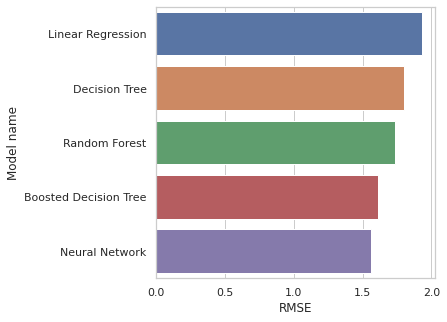

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=df['Model name'], x="RMSE", data=df)
#ax.set(xlim=(0, 1))

In [0]:
#sample = spark.read.csv('/FileStore/tables/sample_submission.csv', header="true", inferSchema="true")

In [0]:
#sampleLR = sample
#sampleDT = sample
#sampleRF = sample
#sampleGBT = sample

In [0]:
#display(sampleLR)

In [0]:
#sampleLR_pd = sampleLR.toPandas()
#new_predictions_pd = new_predictions.select('prediction').toPandas()
#sampleLR_pd['meter_reading'] = new_predictions_pd['prediction']
#sampleLR_pd.head()

In [0]:
#sampleLR_pd.to_csv('/dbfs/FileStore/tables/sampleLR.csv')

In [0]:
#new_predictions_DT = dt_model.transform(eva_df)
#sampleDT_pd = sampleDT.toPandas()
#new_predictions_DT_pd = new_predictions_DT.select('prediction').toPandas()
#sampleDT_pd['meter_reading'] = new_predictions_DT_pd['prediction']
#sampleDT_pd.to_csv('/dbfs/FileStore/tables/sampleDT.csv')

In [0]:
#new_predictions_RF = rfModel.transform(eva_df)
#sampleRF_pd = sampleRF.toPandas()
#new_predictions_RF_pd = new_predictions_RF.select('prediction').toPandas()
#sampleRF_pd['meter_reading'] = new_predictions_RF_pd['prediction']
#sampleRF_pd.to_csv('/dbfs/FileStore/tables/sampleRF.csv')

In [0]:
#new_predictions_GBT = gbt_model.transform(eva_df)
#sampleGBT_pd = sampleGBT.toPandas()
#new_predictions_GBT_pd = new_predictions_GBT.select('prediction').toPandas()
#sampleGBT_pd['meter_reading'] = new_predictions_GBT_pd['prediction']
#sampleGBT_pd.to_csv('/dbfs/FileStore/tables/sampleGBT.csv')